**Data Cleaning & Pre - Processing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
data.drop(columns=['VIN (1-10)'], inplace=True)
data['County'].fillna('Unknown', inplace=True)
data['City'].fillna('Unknown', inplace=True)
data['Postal Code'].fillna(0, inplace=True)
data.dropna(subset=['Electric Range', 'Electric Utility'], inplace=True)
data['Make'] = data['Make'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Postal Code'] = data['Postal Code'].astype(int).astype(str)


<ipython-input-25-aca6a8a943e2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['County'].fillna('Unknown', inplace=True)
<ipython-input-25-aca6a8a943e2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

data["Base MSRP"].replace(0, np.nan, inplace=True)
data["Electric Range"].replace(0, np.nan, inplace=True)
imputer = SimpleImputer(strategy="mean")
def impute_group(column):
    return data.groupby(["Make", "Model"])[column].transform(
        lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten() if not x.isnull().all() else x
    )

data["Base MSRP"] = impute_group("Base MSRP")
data["Electric Range"] = impute_group("Electric Range")
data["Base MSRP"].fillna(data["Base MSRP"].mean(), inplace=True)
data["Electric Range"].fillna(data["Electric Range"].mean(), inplace=True)

<ipython-input-26-fdd7a1966962>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Base MSRP"].replace(0, np.nan, inplace=True)
<ipython-input-26-fdd7a1966962>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

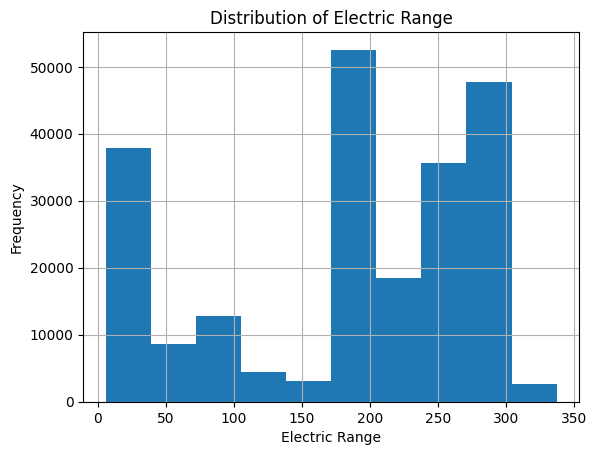

In [ ]:
import matplotlib.pyplot as plt

data['Electric Range'].hist()
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()



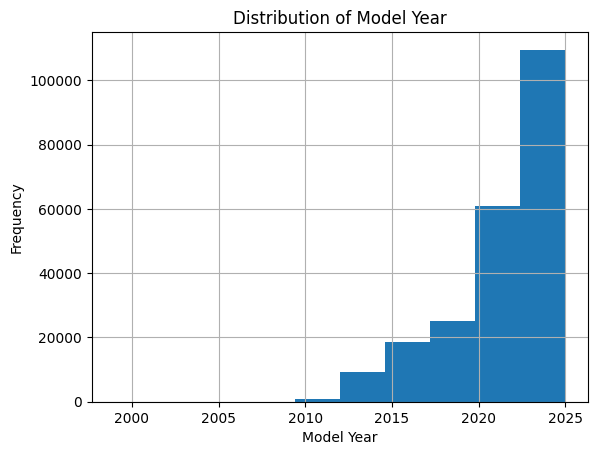

In [ ]:
data['Model Year'].hist()
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(data['Make'].unique())
print(data['Model'].unique())
print(data.dtypes)
print(data.describe())
print(data.sample(5))

['JEEP' 'CHEVROLET' 'BMW' 'TESLA' 'NISSAN' 'LEXUS' 'KIA' 'POLESTAR'
 'HYUNDAI' 'TOYOTA' 'RIVIAN' 'VOLVO' 'FIAT' 'MAZDA' 'AUDI' 'CHRYSLER'
 'FORD' 'MERCEDES-BENZ' 'HONDA' 'MITSUBISHI' 'VOLKSWAGEN' 'SUBARU'
 'PORSCHE' 'JAGUAR' 'MINI' 'GMC' 'LUCID' 'CADILLAC' 'SMART' 'LINCOLN'
 'LAND ROVER' 'GENESIS' 'ALFA ROMEO' 'FISKER' 'DODGE' 'ACURA'
 'MULLEN AUTOMOTIVE INC.' 'TH!NK' 'VINFAST' 'BRIGHTDROP' 'AZURE DYNAMICS'
 'ROLLS-ROYCE' 'WHEEGO ELECTRIC CARS' 'BENTLEY' 'LAMBORGHINI' 'RAM']
['WRANGLER' 'BOLT EV' 'I3' 'MODEL 3' 'MODEL S' '530E' 'MODEL X' 'LEAF'
 'RZ' 'EV6' 'PS2' 'SANTA FE' 'MODEL Y' '330E' 'PRIUS PRIME' 'R1T' 'XC60'
 'X5' '500' 'BOLT EUV' 'CX-90' 'NIRO' 'XC90' 'R1S' 'E-TRON' 'RX' 'IX'
 'PACIFICA' 'IONIQ' 'SOUL' 'F-150' 'Q5 E' 'VOLT' 'SORENTO'
 'GRAND CHEROKEE' 'RAV4 PRIME' 'GLC-CLASS' 'A3' 'CX-70' 'CLARITY' 'C-MAX'
 'OUTLANDER' 'PRIUS PLUG-IN' 'Q5' 'NX' 'SPORTAGE' 'ID.4' 'SOLTERRA'
 'ARIYA' 'E-GOLF' 'FUSION' 'IONIQ 5' 'SPARK' 'MUSTANG MACH-E' 'CAYENNE'
 'TRANSIT' 'BZ4X' 'EQS-CLASS SEDA

In [ ]:
print("Dataset Head:")
print(data.head())
print("\nDataset Shape:", data.shape)
print("\nColumns:", list(data.columns))
data.info()

Dataset Head:
      County          City State Postal Code  Model Year       Make     Model  \
0     Kitsap       Poulsbo    WA       98370        2023       JEEP  WRANGLER   
1  Snohomish  Lake Stevens    WA       98258        2019  CHEVROLET   BOLT EV   
2       King       Seattle    WA       98116        2015        BMW        I3   
3       King       Seattle    WA       98178        2019      TESLA   MODEL 3   
4     Yakima         Selah    WA       98942        2015      TESLA   MODEL S   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           Clean Alternative Fuel Vehicle Eligible           238.0   
2           Cle

**Exploratory Data Analysis**

**Correlation Matrix**

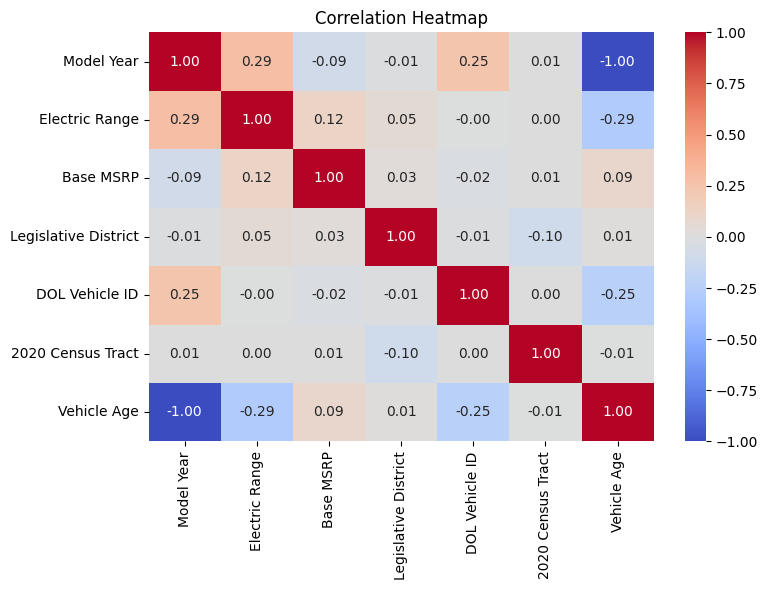

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
numeric_columns = data.select_dtypes(include=['number']).columns
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Pairplot**

<Figure size 1200x800 with 0 Axes>

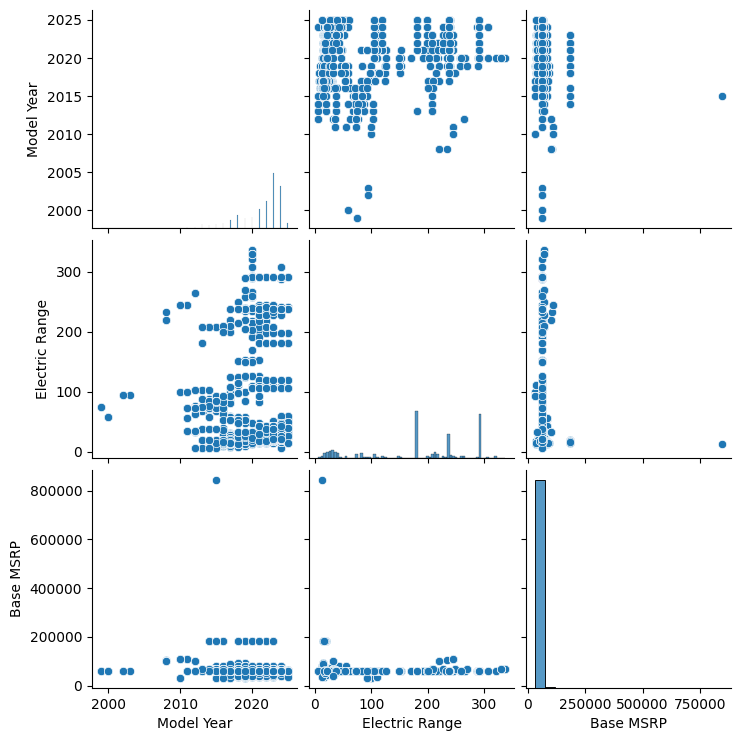

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.pairplot(data[['Model Year', 'Electric Range', 'Base MSRP']])
plt.show()

**Average Electric Range by Model Year**

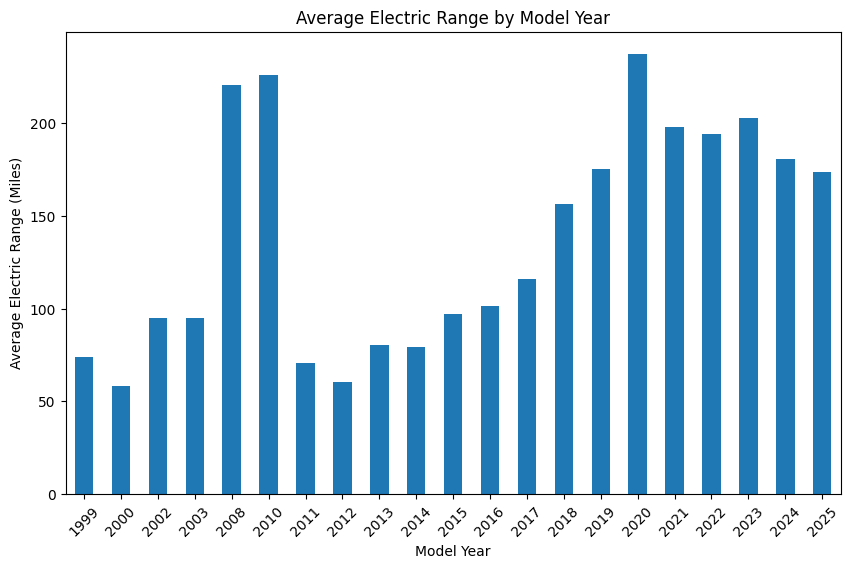

In [ ]:
import matplotlib.pyplot as plt

avg_range_by_year = data.groupby('Model Year')['Electric Range'].mean()

plt.figure(figsize=(10, 6))
avg_range_by_year.plot(kind='bar')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.xticks(rotation=45)
plt.show()

**Top 10 Cities with Most Electric Vehicles**

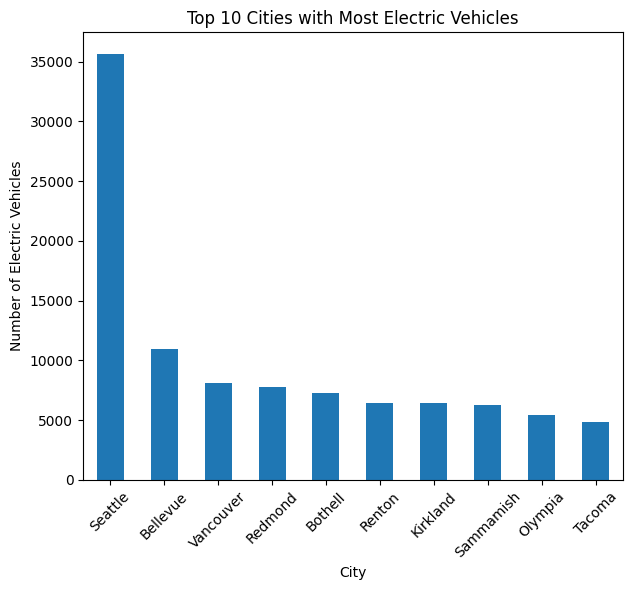

In [ ]:
import matplotlib.pyplot as plt

city_counts = data['City'].value_counts().head(10)
county_counts = data['County'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
city_counts.plot(kind='bar')
plt.title('Top 10 Cities with Most Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Distribution of Electric Vehicles by Range**

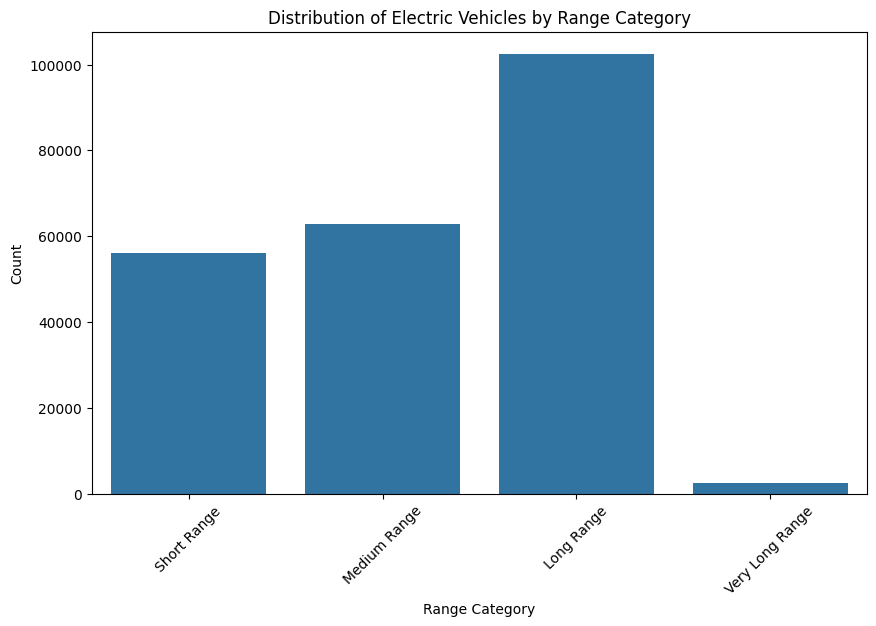

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Range Category'] = pd.cut(data['Electric Range'], bins=[0, 100, 200, 300, float('inf')],
                               labels=['Short Range', 'Medium Range', 'Long Range', 'Very Long Range'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Range Category', data=data)
plt.title('Distribution of Electric Vehicles by Range Category')
plt.xlabel('Range Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Electric Range vs. Vehicle Age**

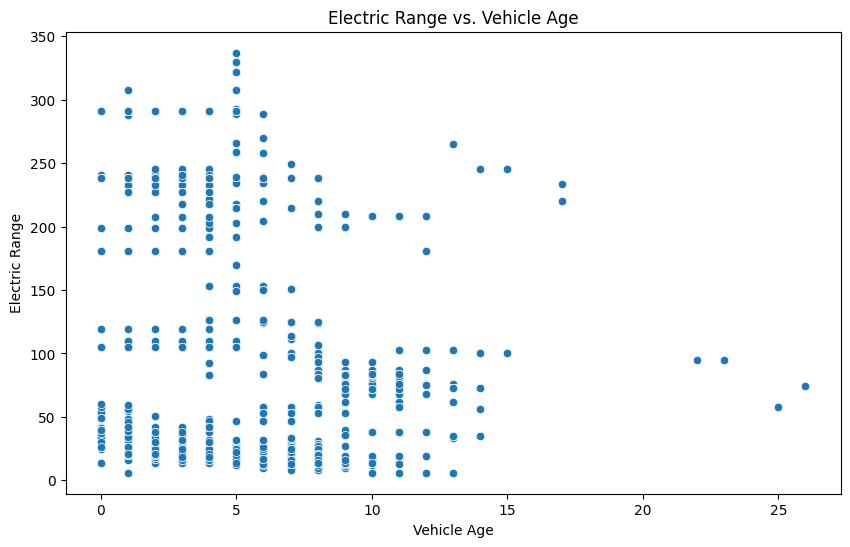

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Vehicle Age'] = 2025 - data['Model Year']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle Age', y='Electric Range', data=data)
plt.title('Electric Range vs. Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Electric Range')
plt.show()

**Number of Electric Vehicles by Age Bracket**

<ipython-input-40-6136fad93f98>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_counts = data.groupby('Age Bracket')['DOL Vehicle ID'].count()


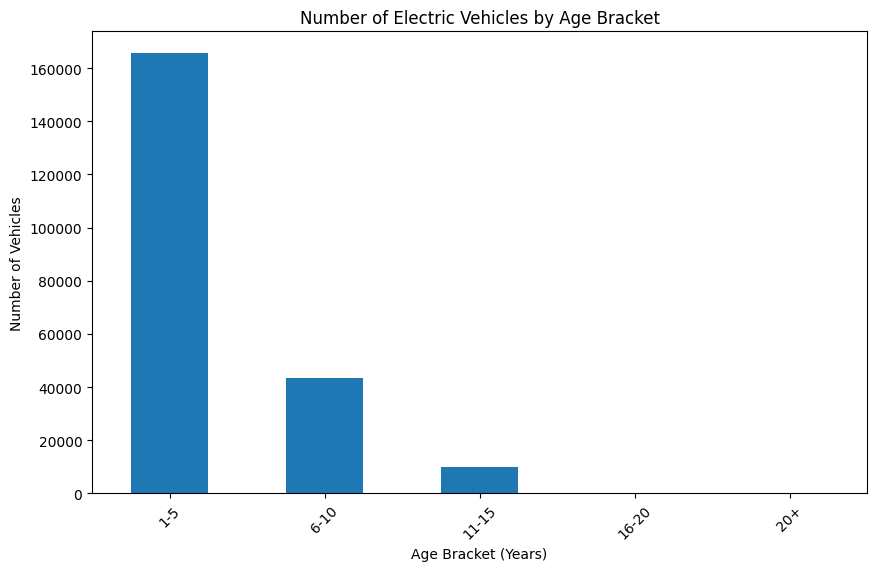

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['Vehicle Age'] = 2025 - data['Model Year']
age_bins = [0, 5, 10, 15, 20, float('inf')]
age_labels = ['1-5', '6-10', '11-15', '16-20', '20+']

data['Age Bracket'] = pd.cut(data['Vehicle Age'], bins=age_bins, labels=age_labels)
age_bracket_counts = data.groupby('Age Bracket')['DOL Vehicle ID'].count()

plt.figure(figsize=(10, 6))
age_bracket_counts.plot(kind='bar')
plt.title('Number of Electric Vehicles by Age Bracket')
plt.xlabel('Age Bracket (Years)')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()